## Comparing distributions

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
#1 get the data

gan_samples = np.load('./../Experiments_Data/generated_data.npy')
training_samples = np.load('./../Experiments_Data/training_data.npy')
folk_rnn_samples = np.load('./../Experiments_Data/folkRnn_data.npy')
#magenta_samples =

## 1. t-SNE comparision

In [59]:
from sklearn.manifold import TSNE

data_tsne = TSNE(n_components=2).fit_transform(training_samples)
gen_tsne = TSNE(n_components=2).fit_transform(gan_samples)
folk_tsne = TSNE(n_components=2).fit_transform(folk_rnn_samples)
#gen_tsne = TSNE(n_components=2).fit_transform(gen_samples)

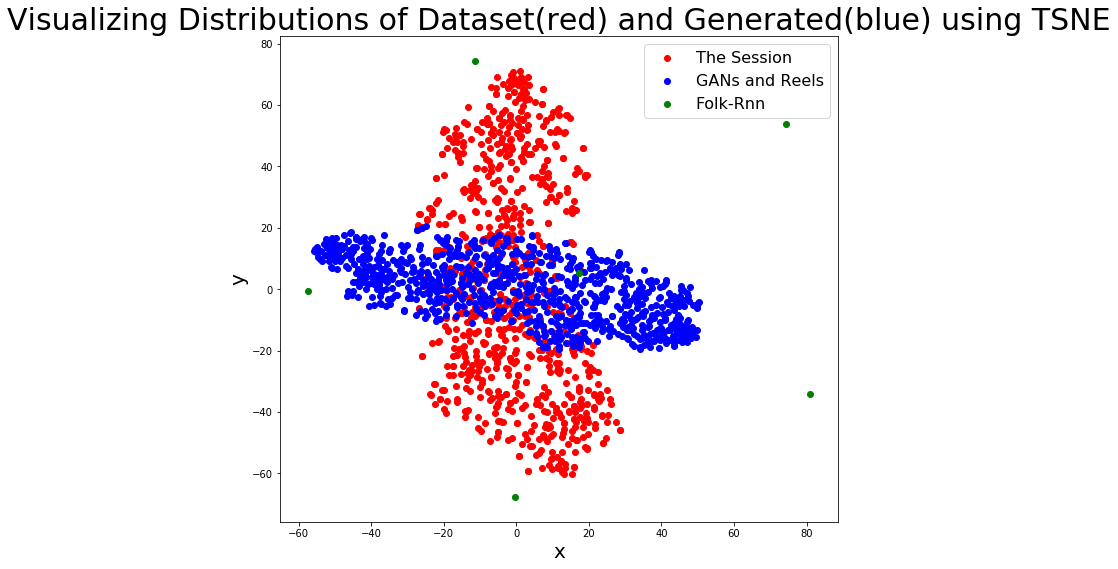

In [60]:
FIG_SIZE = (10, 10)
TITLE_FONT_SIZE = 30
FONT_SIZE = 20
LEGEND_FONT_SIZE = 16
title = 'Visualizing Distributions of Dataset(red) and Generated(blue) using TSNE'
xlabel, ylabel = 'x', 'y'


# ------------------- Format ----------------------------

fig = plt.figure(figsize=FIG_SIZE) # Creates a new figure

ax = fig.add_subplot(111) # add a subplot to the new figure, 111 means "1x1 grid, first subplot"
fig.subplots_adjust(top=0.80) # adjust the placing of subplot, adjust top, bottom, left and right spacing  
ax.set_title(title, fontsize= TITLE_FONT_SIZE) # title of plot

ax.set_xlabel(xlabel,fontsize = FONT_SIZE) #xlabel
ax.set_ylabel(ylabel, fontsize = FONT_SIZE)#ylabel

plt.scatter(data_tsne[:,0], data_tsne[:,1], c='red', label='The Session')
plt.scatter(gen_tsne[:,0], gen_tsne[:,1], c='blue', label='GANs and Reels')
plt.scatter(folk_tsne[:,0], folk_tsne[:,1], c='green', label='Folk-Rnn')

ax.legend(fontsize = LEGEND_FONT_SIZE)
plt.show()

#fig.savefig('test.jpg')


Help on method set in module matplotlib.artist:

set(**kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    A property batch setter. Pass *kwargs* to set properties.

